<a href="https://colab.research.google.com/github/victoria-1989/checkpoint3_WCC/blob/main/Data_Checkpoint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The durations are indicative and obviously depend on each person. If you see that you can't finish an exercise in time, don't hesitate to move to the next exercise.

If you don't have time to finish everything, you can start again this weekend or next week. You will simply indicate in the comments the scripts you have completed afterwards.

# Part 1 - API - around 1h

The following dataset lists a selection of the best restaurants in Paris, at very affordable prices (less than 15 euros per menu on average).
You will use this  [API](https://adresse.data.gouv.fr/api-doc/adresse), to retrieve coordinate points (lon, lat) for each restaurants.



In [ ]:
import pandas as pd

food_paris = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/food.csv").drop(columns = "Unnamed: 0")

In [ ]:
food_paris.head()

,nom,adresse,code postal
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris
2,Pizz'Aria,55 Rue Montmartre,75002 Paris
3,M La Vie,85 Rue Montmartre,75002 Paris
4,Road Trip,36 Rue Poissonnière,75002 Paris


In [ ]:
# Concatenation de l'adresse et du code postal pour obtenir une adresse complète
addresses = (food_paris['adresse'] + ", " + food_paris['code postal']).tolist()

# Fonction pour obtenir les coordonnées d'une adresse
def get_coordinates(address):
    url = f"https://api-adresse.data.gouv.fr/search/?q={address}"
    response = requests.get(url)
    data = response.json()
    if data['features']:
        coordinates = data['features'][0]['geometry']['coordinates']
        return coordinates
    else:
        return None

# Obtenir les coordonnées de chaque adresses
restaurant_coordinates = {address: get_coordinates(address) for address in addresses}

# Impression des résultats
for address, coordinates in restaurant_coordinates.items():
    print(f"Address: {address}")
    print(f"Coordinates: {coordinates}")

Address: 12 Rue de Richelieu, 75001 Paris
Coordinates: [2.336258, 48.864374]
Address: 7 Rue du Jour, 75001 Paris
Coordinates: [2.344247, 48.86355]
Address: 55 Rue Montmartre, 75002 Paris
Coordinates: [2.344484, 48.865983]
Address: 85 Rue Montmartre, 75002 Paris
Coordinates: [2.343757, 48.867596]
Address: 36 Rue Poissonnière, 75002 Paris
Coordinates: [2.34794, 48.869951]
Address: 29 Rue des Jeuneurs, 75002 Paris
Coordinates: [2.344421, 48.869541]
Address: 214 Rue Saint-Martin, 75003 Paris
Coordinates: [2.35287, 48.863752]
Address: 33 Bd Beaumarchais, 75003 Paris
Coordinates: [2.368186, 48.856]
Address: 10 Rue des Archives, 75004 Paris
Coordinates: [2.354532, 48.857587]
Address: 60 Rue Quincampoix, 75004 Paris
Coordinates: [2.35082, 48.861576]
Address: 11 Rue Mandar, 75002 Paris
Coordinates: [2.345252, 48.865693]
Address: 29 Rue Mazarine, 75006 Paris
Coordinates: [2.338081, 48.85465]
Address: 157 Bd du Montparnasse, 75006 Paris
Coordinates: [2.334627, 48.840547]
Address: 65 Av. de la Bou

# Folium

You will now project these restaurants on a map, using the `Folium` library.

In [ ]:
import folium

# Création d'une carte centrée sur Paris (ville cible de tous les restaurants)
m = folium.Map(location=[48.8566, 2.3522], zoom_start=13)

# Ajouter un marqueur sur chaque restaurants
for address, coordinates in restaurant_coordinates.items():
    if coordinates:
        folium.Marker(
            location=[coordinates[1], coordinates[0]],
            popup=address
        ).add_to(m)

# Sauvegarde de la carte en un fichier HTML et resultat
m.save("paris_restaurants_map.html")
m

# Sorting and grouping

You can now build a descending ranking,  considering the number of restaurants per district.

In [ ]:
# Extraction des arrondissements par le code postal
food_paris['arrondissement'] = food_paris['code postal'].str[:5]

# Compte des nombres de restaurants par arrondissement et création des colonnes
arrondissement_counts = food_paris['arrondissement'].value_counts().reset_index()
arrondissement_counts.columns = ['Arrondissement', 'Nombre de restaurants']

# Tri des arrondissements par nombre de restaurants en ordre décroissant
arrondissement_counts = arrondissement_counts.sort_values(by='Nombre de restaurants', ascending=False)

# Affichage du résultat
arrondissement_counts

,Arrondissement,Nombre de restaurants
0,75002,5
1,75009,4
2,75010,4
3,75011,3
4,75001,2
5,75003,2
6,75004,2
7,75006,2
8,75008,2
9,75007,1


# Part 2 - Data exploration & processing - Python & Pandas - around 30 min

Run the code below. You will get a DataFrame with 10 000 restaurant comments.
- date: the date of the comment
- stars: the rating (from 1 to 5)
- text: the text of the review
- useful: the number of users who indicated this comment as "useful"
- sentiment: the word "good" or "bad" depending on the stars rating

The goal of these parts will be to explore this dataset, then to propose a prediction model of positive rating according to the other features.

Start by checking that there are no missing values.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_restaurants = pd.read_csv("https://github.com/WildCodeSchool/wilddata/raw/main/restaurant.zip", index_col='Unnamed: 0').loc[:,["date", "stars", "text", "useful"]]
df_restaurants["sentiment"] = df_restaurants["stars"].apply(lambda x: "bad" if x <=3 else "good")
df_restaurants

,date,stars,text,useful,sentiment
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good
1,2011-07-27,5,I have no idea why some people give bad review...,0,good
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good
...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad


In [ ]:
missing_values = df_restaurants.isnull().sum()
missing_values

date         0
stars        0
text         0
useful       0
sentiment    0
dtype: int64

## Column "text"

Use **apply** to create a new column `len_text`, indicating the length (number of characters) of each comment.

Draw a histogram and a boxplot to represent the distribution of this "len_text" column. Are the values well distributed? Are most comments long or short?

In [ ]:
df_restaurants['len_text'] = df_restaurants['text'].apply(len)
df_restaurants.head()

,date,stars,text,useful,sentiment,len_text
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,good,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good,469


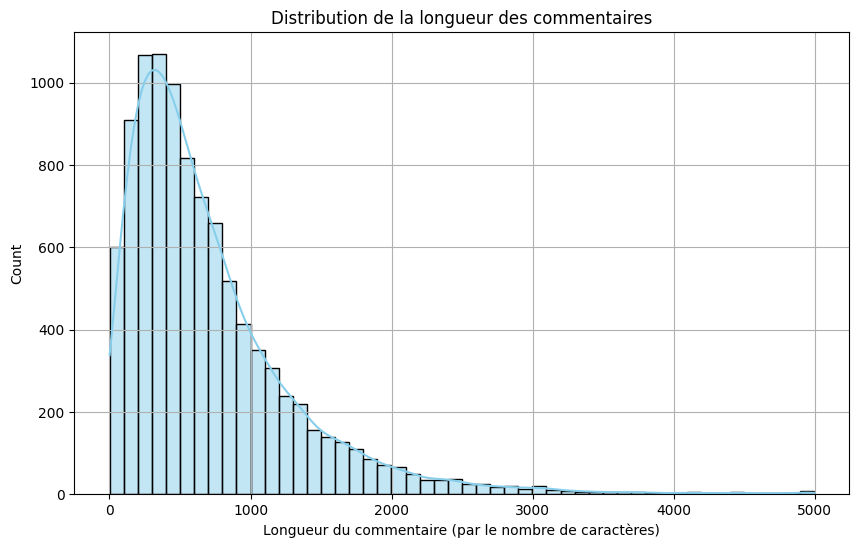

In [ ]:
# Création de l'histogramme

plt.figure(figsize=(10, 6))
sns.histplot(data=df_restaurants, x='len_text', bins=50, kde=True, color='skyblue')
plt.title('Distribution de la longueur des commentaires')
plt.xlabel('Longueur du commentaire (par le nombre de caractères)')
plt.grid(True)
plt.show()

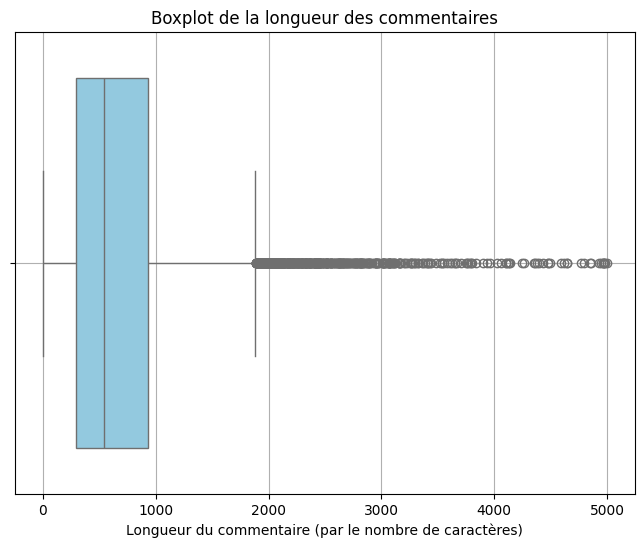

In [ ]:
# Création du boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_restaurants, x='len_text', color='skyblue')
plt.title('Boxplot de la longueur des commentaires')
plt.xlabel('Longueur du commentaire (par le nombre de caractères)')
plt.grid(True)
plt.show()

La répartition n'est pas très égale car il existe des outliers très éloignés de la médiane (médiane à 600 et les outliers sont répartis entre 2000 et 5000)
Le commentaire le moins long fait 0 caractères et le plus long en fait 5000

## Column "stars"

- Draw a scatterplot to compare the `useful` column and the `stars` column. Do you think there is a correlation? Please compute the correlation coefficient.

- Ditto between `len_text` and `useful`.

- Please comment and interpret the results.



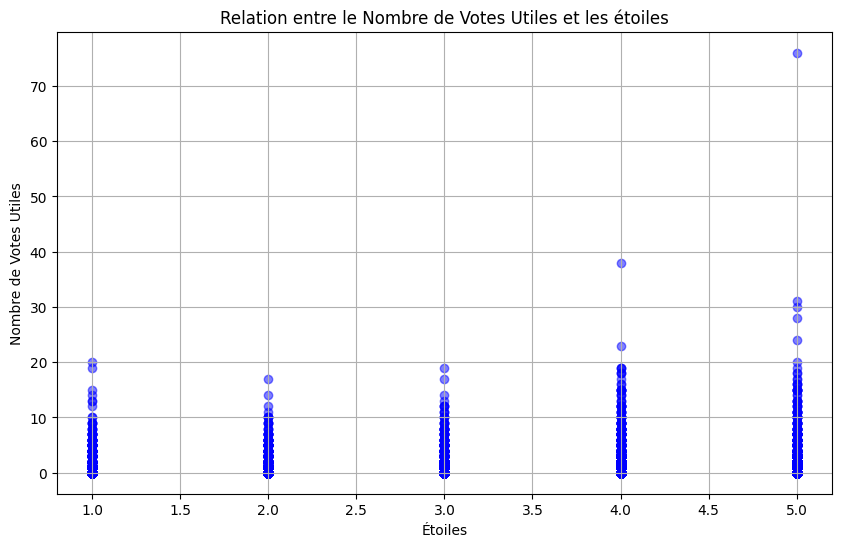

In [ ]:
# Création du scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_restaurants['stars'], df_restaurants['useful'], color='blue', alpha=0.5)
plt.title('Relation entre le Nombre de Votes Utiles et les étoiles')
plt.xlabel('Étoiles')
plt.ylabel('Nombre de Votes Utiles')
plt.grid(True)
plt.show()

In [ ]:
correlation_coefficient = df_restaurants['stars'].corr(df_restaurants['useful'])
correlation_coefficient

-0.023478955127693917

In [ ]:
# Calcul du coefficient de corrélation entre 'len_text' et 'useful'
correlation_coefficient = df_restaurants['len_text'].corr(df_restaurants['useful'])

A la lecture du graphique et du coéfficient de corrélation, les colonnes "stars" et "useful" ne semblent pas être corrélées

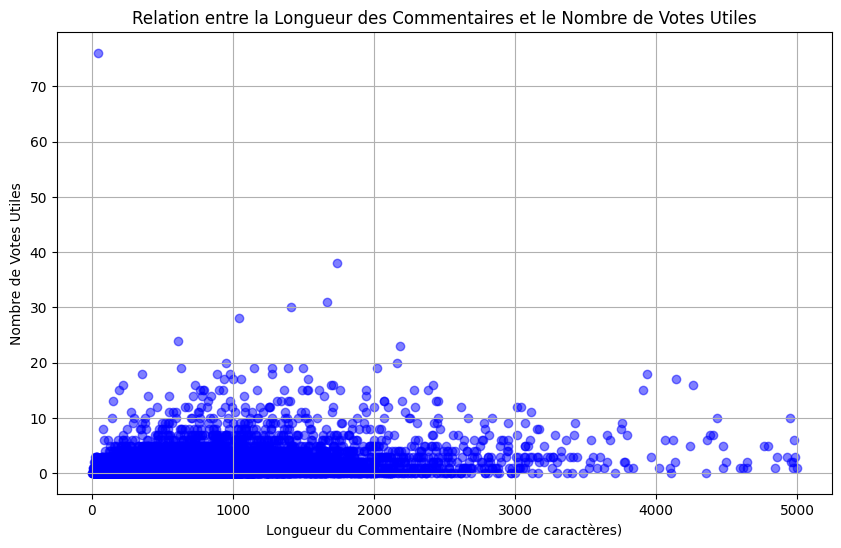

In [ ]:
# Création du scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_restaurants['len_text'], df_restaurants['useful'], color='blue', alpha=0.5)
plt.title('Relation entre la Longueur des Commentaires et le Nombre de Votes Utiles')
plt.xlabel('Longueur du Commentaire (Nombre de caractères)')
plt.ylabel('Nombre de Votes Utiles')
plt.grid(True)
plt.show()

In [ ]:
correlation_coefficient = df_restaurants['len_text'].corr(df_restaurants['useful'])
correlation_coefficient

0.29397538215526103

Concernant la relation entre la Longueur des Commentaires et le Nombre de Votes Utiles, on peut observer que le coefficient de corrélation est positif, ce qui
signifie qu'il y a une tendance où les commentaires plus longs ont tendance à recevoir plus de votes utiles mais la corrélation n'est pas très forte.

# Part 3 : NLP - Sentiment analysis classification - 2h

Define `X` which will contain only the `text` column. And `y` will be the `sentiment` column.

In [ ]:
# Définition de X et y
X = df_restaurants['text']
y = df_restaurants['sentiment']

## Create a function to clean up stopwords and punctuation

You can call your function `func_clean`.
Your function must take a `str` as a single parameter, and return a `str`.

For example:

`func_clean("Hello, how are you? Fine, thank you.")`

`>>> 'hello fine thank'`

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

# Télécharger les ressources NLTK
nltk.download('stopwords')

# Définition de la fonction func_clean pour nettoyer les stopwords et la ponctuation
def func_clean(text):
    # Chargement des stopwords en anglais
    stop_words = set(stopwords.words('english'))

    # Supprimer la ponctuation et diviser le texte en mots
    translator = str.maketrans('', '', string.punctuation)
    words = text.translate(translator).lower().split()

    # Filtrer les stopwords
    cleaned_words = [word for word in words if word not in stop_words]

    # Reconstitution du texte nettoyé
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

# Exemple d'utilisation de la fonction func_clean
input_text = "Hello, how are you? Fine, thank you."
cleaned_text = func_clean(input_text)

print(cleaned_text)

hello fine thank


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Apply this function

Apply this function to `X` and store the result in `X_clean`.

In [ ]:
X_clean = X.apply(func_clean)

# Afficher les premières lignes de X_clean pour vérifier
X_clean.head()

0    wife took birthday breakfast excellent weather...
1    idea people give bad reviews place goes show p...
2    love gyro plate rice good also dig candy selec...
3    rosie dakota love chaparral dog park convenien...
4    general manager scott petello good egg go deta...
Name: text, dtype: object

## Train test split

Split your `X_clean` and `y` data with a train test split, and the same `random_state = 32`.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=32)

## TfidfVectorizer

- Train `TfidfVectorizer` on `X_train`.
- Transform `X_train` with your vectorizer and store the result in `X_train_vecto`.
- Transform `X_test` with your vectorizer and store the result in `X_test_vecto`.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# Entraîner le vectorizer sur X_train et transformer X_train et X_test
X_train_vecto = tfidf_vectorizer.fit_transform(X_train)
X_test_vecto = tfidf_vectorizer.transform(X_test)

## Logistic regression

Train a logistic regression on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting?

Also display a confusion matrix for the test set. How many "bad" comments are correctly predicted?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=32)

# Entraîner le modèle sur X_train_vecto et y_train
logreg.fit(X_train_vecto, y_train)

y_train_pred = logreg.predict(X_train_vecto)
y_test_pred = logreg.predict(X_test_vecto)

# Calculer les scores de précision
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy sur l'ensemble d'entraînement : {train_accuracy:.4f}")
print(f"Accuracy sur l'ensemble de test : {test_accuracy:.4f}")


Accuracy sur l'ensemble d'entraînement : 0.8986
Accuracy sur l'ensemble de test : 0.8340


La différence de précision entre l'ensemble d'entrainement et de l'ensemble de test n'est pas très significative. Le modèle de régression logistique n'est pas surentrainé

In [ ]:
# Créer la matrice de confusion
confusion = confusion_matrix(y_test, y_test_pred)
print("Matrice de confusion :")
print(confusion)

# Nombre de commentaires "bad" correctement prédits (true negatives)
tn_count = conf_matrix[0, 0]
print(f"\nNombre de commentaires 'bad' correctement prédits : {tn_count}")

Matrice de confusion :
[[ 357  253]
 [  79 1311]]

Nombre de commentaires 'bad' correctement prédits : 357


## Decision tree
Train a decision tree on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting? Are the scores better than previously?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Créer une instance de DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=32)

# Entraîner le modèle sur X_train_vecto et y_train
tree_classifier.fit(X_train_vecto, y_train)

y_train_pred_tree = tree_classifier.predict(X_train_vecto)
y_test_pred_tree = tree_classifier.predict(X_test_vecto)

# Calculer les scores de précision
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print(f"Accuracy sur l'ensemble d'entraînement : {train_accuracy_tree:.4f}")
print(f"Accuracy sur l'ensemble de test : {test_accuracy_tree:.4f}")

Accuracy sur l'ensemble d'entraînement : 1.0000
Accuracy sur l'ensemble de test : 0.6920


Comparé à la Logistic Regression où la différence entre l'ensemble d'entraînement et l'ensemble de test n'était pas très significative, l'arbre de décision montre une différence beaucoup plus élevé et des scores moins bons que précédemment. Cela indique un fort surapprentissage.

## Bonus question (optional)

Use `GridsearchCV` to find the best parameters.
Make sure you don't do more than 1000 different iterations (i.e. combinations).
Otherwise, the time may seem very long...





In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir la grille de paramètres réduite
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

tree_classifier = DecisionTreeClassifier(random_state=32)

grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1,
                           refit=True, error_score='raise')

# Entraîner GridSearchCV
grid_search.fit(X_train_vecto, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)
print("Meilleur score de validation croisée : {:.4f}".format(grid_search.best_score_))

# Évaluer sur l'ensemble de test
test_accuracy = grid_search.score(X_test_vecto, y_test)
print("Accuracy sur l'ensemble de test : {:.4f}".format(test_accuracy))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres trouvés :  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Meilleur score de validation croisée : 0.7179
Accuracy sur l'ensemble de test : 0.7030


# Optionnel : Algorithme `JSON` et manipulation.
This is a json file containing several keys.
Each key has a value, which could potentially be another key, containing another value, which could potentially be another key etc...

In [ ]:
food = {
  "clé1": {
    "fruit1": "pomme",
    "légume4": "brocoli"
  },
  "clé2": {
    "légume1": "carotte",
    "fruit5": "banane",
    "légume3": "courgette"
  },
  "clé3": {
    "niveau1": {
      "niveau2": {
        "fruit3": "orange",
        "légume5": "aubergine",
        "fruit5": "mangue"
      }
    }
  },
  "clé4": {
    "niveau1": {
      "niveau2": {
        "niveau3": {
          "fruit6": "raisin",
          "fruit7": "fraise",
          "légume4": "poivron",
          "fruit2": "pastèque"
        }
      }
    }
  }
}


Problem:
Fruits and vegetables have been misplaced in this json file. The goal is to retrieve each of the fruits and vegetables, and assign them to two corresponding lists: `fruits_list` & `vegetables_list`.

Expected solution:

`fruits_list` = `['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque']`

`vegetables_list` = `['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']`



In [ ]:
def collect_items(item, fruits_list, vegetables_list):
    if isinstance(item, dict):
        for key, value in item.items():
            if isinstance(value, dict):
                collect_items(value, fruits_list, vegetables_list)
            elif isinstance(value, str):
                if key.startswith("fruit"):
                    fruits_list.append(value)
                elif key.startswith("légume"):
                    vegetables_list.append(value)

# Initialiser des listes pour stocker les fruits et légumes
fruits_list = []
vegetables_list = []

# Collecter les informations des dictionnaires
for key, value in food.items():
    collect_items(value, fruits_list, vegetables_list)

# Afficher les résultats
print("fruits_list =", fruits_list)
print("vegetables_list =", vegetables_list)

fruits_list = ['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque']
vegetables_list = ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']


Next, you'll create a new dictionary, which will simply contain two keys: `fruits` & `vegetables`. Each key will have the value of the list of fruits and the list of vegetables. That way, everything will be in order.

Expected solution:
`food_dict` = `{'fruits': ['pomme',
  'banane',
  'orange',
  'mangue',
  'raisin',
  'fraise',
  'pastèque'],
 'legumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}`

In [ ]:
# Créer le nouveau dictionnaire 'food_dict'
food_dict = {'fruits': fruits_list, 'legumes': vegetables_list}

# Afficher le résultat
print("food_dict =", food_dict)

food_dict = {'fruits': ['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque'], 'legumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}
